In [89]:
import matplotlib.pyplot as plt
import os
from pathlib import Path
import json
import numpy as np

In [90]:
path_to_files = '/home/lcur0949/Computer-vision-2-project/PVD/output/pvd_test/50timesteps'
all_au_pros = []
all_curves = []

for filename in Path(path_to_files).rglob('*.json'):
    data = json.load(open(filename))
    au_dict = list(data.values())[0]
    all_au_pros.append(au_dict['au_pro'])
    all_curves.append(au_dict['pro_curve'])

In [91]:
mean_au_pro_50 = np.mean(all_au_pros, axis=0)
mean_curve_50 = np.mean(all_curves, axis=0)
mean_au_pro_50 = np.insert(mean_au_pro_50, 0, 0)
limits = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [92]:
path_to_files = '/home/lcur0949/Computer-vision-2-project/PVD/output/pvd_test/250timesteps'
all_au_pros = []
all_curves = []

for filename in Path(path_to_files).rglob('*.json'):
    data = json.load(open(filename))
    au_dict = list(data.values())[0]
    all_au_pros.append(au_dict['au_pro'])
    all_curves.append(au_dict['pro_curve'])
    
mean_au_pro_250 = np.mean(all_au_pros, axis=0)
mean_au_pro_250 = np.insert(mean_au_pro_250, 0, 0)
mean_curve_250 = np.mean(all_curves, axis=0)

In [93]:
path_to_files = '/home/lcur0949/Computer-vision-2-project/PVD/output/pvd_test/150timesteps'
all_au_pros = []
all_curves = []

for filename in Path(path_to_files).rglob('*.json'):
    data = json.load(open(filename))
    au_dict = list(data.values())[0]
    all_au_pros.append(au_dict['au_pro'])
    all_curves.append(au_dict['pro_curve'])
    
mean_au_pro_150 = np.mean(all_au_pros, axis=0)
mean_au_pro_150 = np.insert(mean_au_pro_150, 0, 0)
mean_curve_150 = np.mean(all_curves, axis=0)

In [94]:
path_to_files = '/home/lcur0949/Computer-vision-2-project/PVD/output/pvd_test/100timesteps'
all_au_pros = []
all_curves = []

for filename in Path(path_to_files).rglob('*.json'):
    data = json.load(open(filename))
    au_dict = list(data.values())[0]
    all_au_pros.append(au_dict['au_pro'])
    all_curves.append(au_dict['pro_curve'])
    
mean_au_pro_100 = np.mean(all_au_pros, axis=0)
mean_au_pro_100 = np.insert(mean_au_pro_100, 0, 0)
mean_curve_100 = np.mean(all_curves, axis=0)

In [95]:
path_to_files = '/home/lcur0949/Computer-vision-2-project/PVD/output/pvd_test/15timesteps'
all_au_pros = []
all_curves = []

for filename in Path(path_to_files).rglob('*.json'):
    data = json.load(open(filename))
    au_dict = list(data.values())[0]
    all_au_pros.append(au_dict['au_pro'])
    all_curves.append(au_dict['pro_curve'])
    
mean_au_pro_15 = np.mean(all_au_pros, axis=0)
mean_au_pro_15 = np.insert(mean_au_pro_15, 0, 0)
mean_curve_15 = np.mean(all_curves, axis=0)

In [96]:
path_to_files = '/home/lcur0949/Computer-vision-2-project/PVD/output/pvd_test/20timesteps'
all_au_pros = []
all_curves = []

for filename in Path(path_to_files).rglob('*.json'):
    data = json.load(open(filename))
    au_dict = list(data.values())[0]
    all_au_pros.append(au_dict['au_pro'])
    all_curves.append(au_dict['pro_curve'])
    
mean_au_pro_20 = np.mean(all_au_pros, axis=0)
mean_au_pro_20 = np.insert(mean_au_pro_20, 0, 0)
mean_curve_20 = np.mean(all_curves, axis=0)

In [97]:
path_to_files = '/home/lcur0949/Computer-vision-2-project/PVD/output/pvd_test/25timesteps'
all_au_pros = []
all_curves = []

for filename in Path(path_to_files).rglob('*.json'):
    data = json.load(open(filename))
    au_dict = list(data.values())[0]
    all_au_pros.append(au_dict['au_pro'])
    all_curves.append(au_dict['pro_curve'])
    
mean_au_pro_25 = np.mean(all_au_pros, axis=0)
mean_au_pro_25 = np.insert(mean_au_pro_25, 0, 0)
mean_curve_25 = np.mean(all_curves, axis=0)

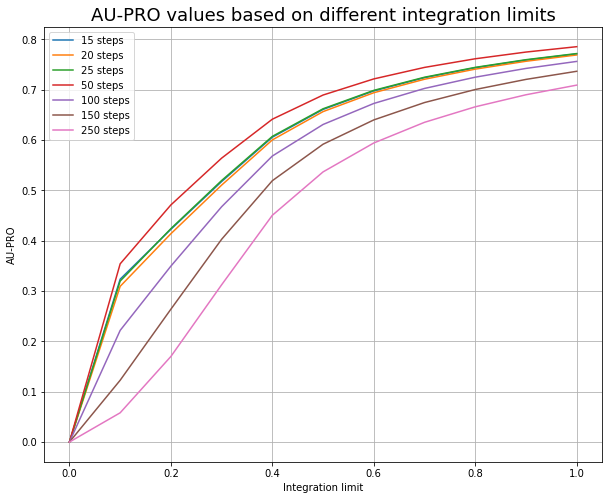

In [99]:
# plt.figure()
# plt.xlabel('False positive rate')
# plt.ylabel('PRO value')
# for i, lim in enumerate(limits):
#     fpr, pro = mean_curve[i]
#     plt.plot(fpr, pro, label=lim)
    
# plt.legend()
# plt.show()
# plt.savefig(os.path.join(output_dir,'pro_curve_%s.png' % (type_of_data)))


#The PRO [4] metric, defined as the average relative
# overlap of the binary prediction P with each ground truth connected component Ck where K denotes the number of
# ground truth components. The final metric is computed by
# integrating this curve up to some false positive rate and normalizing
fig = plt.figure(figsize=(10, 8))
plt.xlabel('Integration limit')
plt.ylabel('AU-PRO')
plt.title("AU-PRO values based on different integration limits", size=18)
plt.plot(limits, mean_au_pro_15, label='15 steps')
plt.plot(limits, mean_au_pro_20, label='20 steps')
plt.plot(limits, mean_au_pro_25, label='25 steps')
plt.plot(limits, mean_au_pro_50, label='50 steps')
plt.plot(limits, mean_au_pro_100, label='100 steps')
plt.plot(limits, mean_au_pro_150, label='150 steps')
plt.plot(limits, mean_au_pro_250, label='250 steps')
plt.grid()
plt.legend()

plt.savefig('au_pro_values_all_steps.jpg')
# plt.savefig('au_pro_values_all_steps_no_grid.jpg')


In [100]:
mean_au_pro_50

array([0.        , 0.35392285, 0.47091306, 0.56380517, 0.641167  ,
       0.68916807, 0.72116878, 0.74402644, 0.76116967, 0.77450331,
       0.78517021])